In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## Task 1

In [8]:
df = pd.read_csv("pet_supplies_cleaned_2212.csv")
df=df.rename(columns = {'repeate_purchase':'repeat_purchase'})
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,3,Food,Dog,Medium,31.23,898.30,5,1
1,4,Medicine,Cat,Small,24.95,982.15,6,1
2,5,Housing,Cat,Small,26.18,832.63,7,1
3,6,Housing,Dog,Small,30.77,874.58,7,0
4,472,Medicine,Dog,Medium,28.06,842.07,0,0


## Task 2

In [43]:
df2 = pd.read_csv("pet_supplies_category_groupby_repeat_purchase.csv")
df2

,category,total_repeat_purchase
0,Medicine,153
1,Unknown,14
2,Food,151
3,Equipment,221
4,Accessory,70
5,Housing,152
6,Toys,145


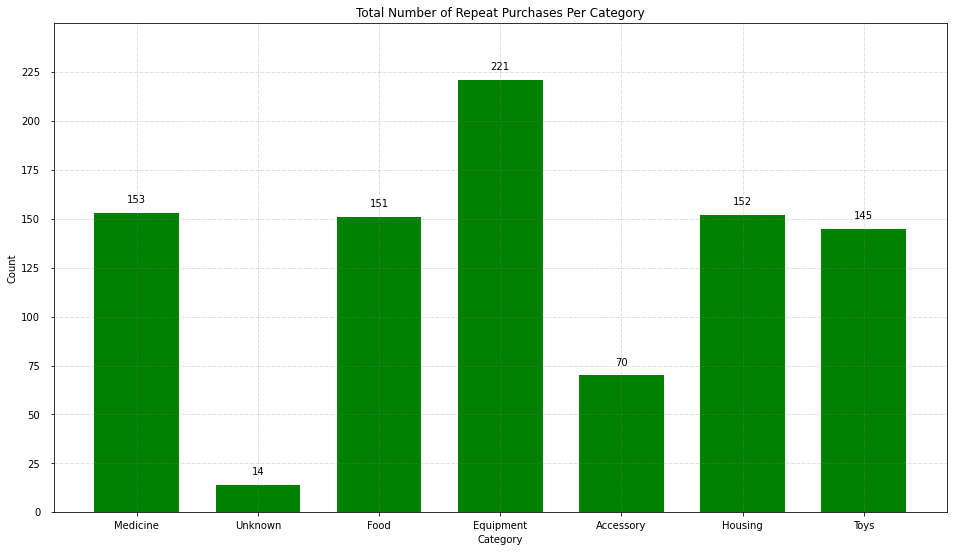

In [96]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+5, y[i], ha = 'center')

fig, ax = plt.subplots(figsize =(16, 9))

plt.bar(df2['category'],df2['total_repeat_purchase'], width=0.7, color='green')

ax.set(ylim=(0, 250), yticks=np.arange(0, 250, 25))

# Add x, y gridlines
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5)

addlabels(df2['category'],df2['total_repeat_purchase'])
        
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Total Number of Repeat Purchases Per Category")
plt.savefig('category_total_repeat_purchase.png')
plt.show()

## Task 3

In [93]:
df3 = pd.read_csv("pet_supplies_category_groupby_sales.csv")
df3

,category,total_sales
0,Medicine,214066.25
1,Unknown,28316.27
2,Food,287138.16
3,Equipment,348875.24
4,Accessory,121273.44
5,Housing,175330.31
6,Toys,319897.10


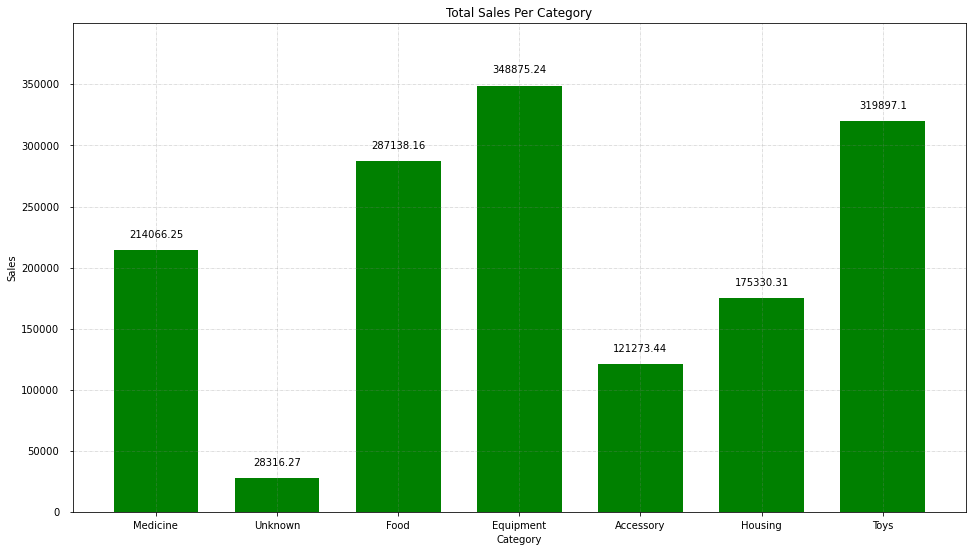

In [101]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+10000, y[i], ha = 'center')

fig, ax = plt.subplots(figsize =(16, 9))

plt.bar(df3['category'],df3['total_sales'], width=0.7, color='green')

ax.set(ylim=(0, 400000), yticks=np.arange(0, 400000, 50000))

# Add x, y gridlines
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5)

addlabels(df3['category'],df3['total_sales'])
        
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Total Sales Per Category")
plt.savefig('category_total_sales.png')
plt.show()

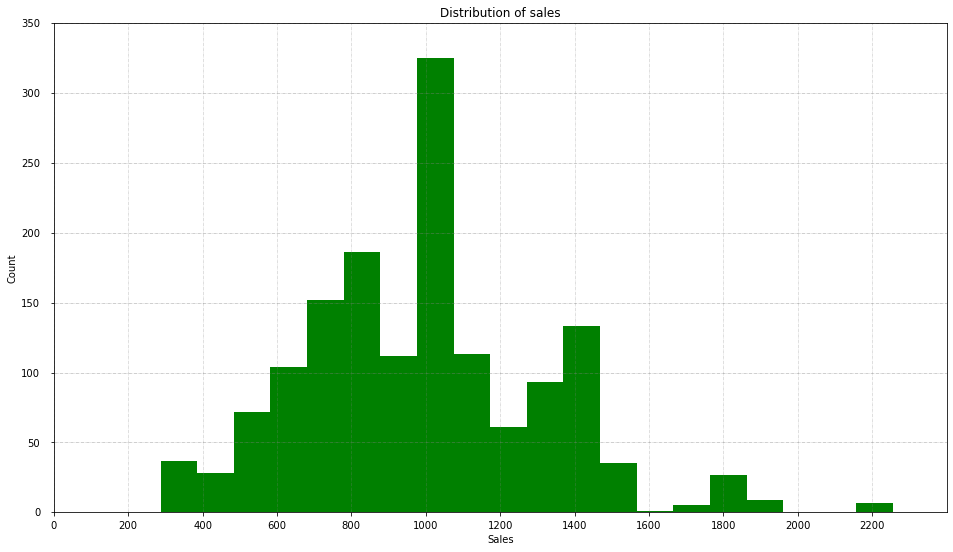

In [168]:
 # Generate data on commute times.
fig, ax = plt.subplots(figsize =(16, 9))

commutes = df['sales']

plt.axis([0, 2400, 0, 350])
ax.set(xlim=(0, 2400), xticks=np.arange(0, 2400, 200))
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5)


commutes.plot.hist(grid=True, bins=20, rwidth=1,
                   color='green')
plt.title('Distribution of sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.savefig('distribution_of_sales.png')
plt.show()

In [169]:
df5 = pd.read_csv('pet_supplies_category_more_than_1600_sales.csv')
df5

,category,count
0,Equipment,1
1,Food,20
2,Medicine,2
3,Toys,22
4,Unknown,3


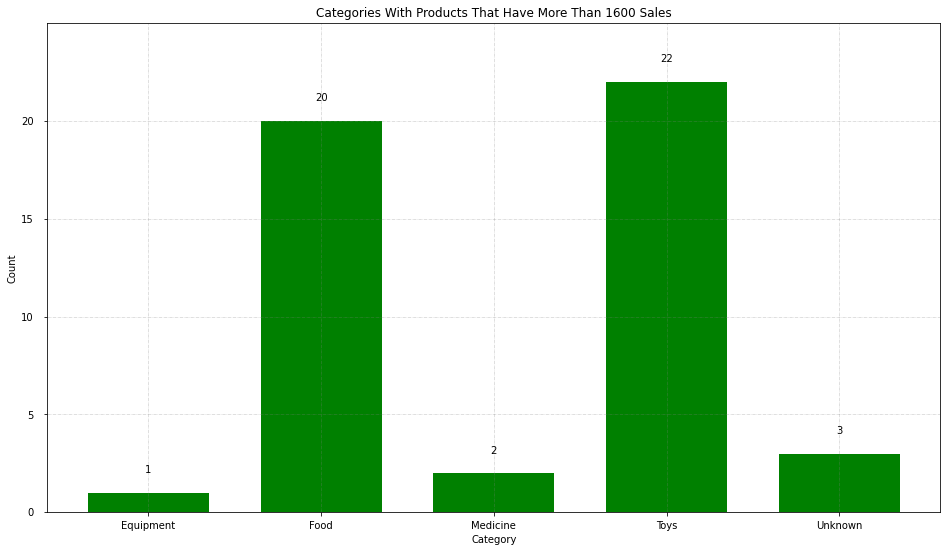

In [170]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha = 'center')

fig, ax = plt.subplots(figsize =(16, 9))

plt.bar(df5['category'],df5['count'], width=0.7, color='green')

ax.set(ylim=(0, 25), yticks=np.arange(0, 25, 5))

# Add x, y gridlines
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5)

addlabels(df5['category'],df5['count'])
        
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Categories With Products That Have More Than 1600 Sales")
plt.savefig('category_more_than_1600_sales.png')
plt.show()

## Task 4

In [103]:
df4 = pd.read_csv("pet_supplies_repeat_purchase_sales.csv")
df4

,category,total_repeat_purchase,total_sales
0,Medicine,153,214066.25
1,Unknown,14,28316.27
2,Food,151,287138.16
3,Equipment,221,348875.24
4,Accessory,70,121273.44
5,Housing,152,175330.31
6,Toys,145,319897.10


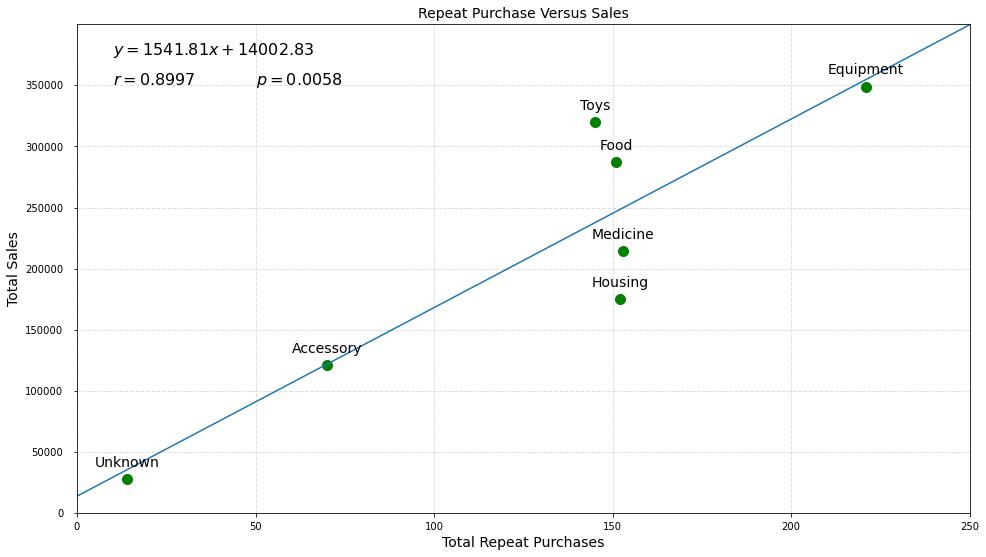

In [138]:
def addlabels(x,y,z):
    for i in range(len(x)):
        plt.text(x[i], y[i]+10000, z[i], ha = 'center', fontsize=14)
        
fig, ax = plt.subplots(figsize =(16, 9))
plt.plot(df4['total_repeat_purchase'], df4['total_sales'], 'ro', color='green', markersize='10')
plt.axis([0, 250, 0, 400000])
addlabels(df4['total_repeat_purchase'], df4['total_sales'], df4['category'])

ax.set(ylim=(0, 400000), yticks=np.arange(0, 400000, 50000))

# Add x, y gridlines
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5)

m, b = np.polyfit(x=df4['total_repeat_purchase'], y=df4['total_sales'], deg=1)

plt.axline(xy1=(0, b), slope=m, label=f'$y = {m}x {b:+}$')
plt.text(10, 375000, f'$y = {round(m, 2)}x {round(b,2):+}$', ha = 'left', fontsize=16 )

statistics = stats.pearsonr(df4['total_repeat_purchase'], df4['total_sales'])
plt.text(10, 350000, f'$r = {round(statistics[0],4)}$', ha = 'left', fontsize=16 )
plt.text(50, 350000, f'$p = {round(statistics[1],4)}$', ha = 'left', fontsize=16 )


plt.xlabel("Total Repeat Purchases", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.title("Repeat Purchase Versus Sales", fontsize=14)
plt.savefig('repeat_purchase_sales.png')
plt.show()

In [140]:
stats.pearsonr(df4['total_repeat_purchase'], df4['total_sales'])

(0.8997380782530593, 0.005788409420446712)

In [141]:
round(m,2)

1541.81

In [142]:
round(b, 2)

14002.83